# Fakultät für Physik 

## Physikalisches Praktikum P1 für Studierende der Physik

Versuch P1-71, 72, 73 (Stand: Dezember 2022)

[Raum F1-14](http://www-ekp.physik.uni-karlsruhe.de/~simonis/praktikum/layoutobjekte/Lageplan_P1.png)

# Spezifische Ladung des Elektrons

Name: Aichert    Vorname: Julius E-Mail: uhoeb@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Achtner   Vorname: Martin E-Mail: urrvl@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo01

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 8.11.2023

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________



# Durchführung

## Aufgabe 1: Fadenstrahlrohr

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-1.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/blob/main/Spezifische_Ladung_des_Elektrons/doc/Hinweise-Aufgabe-1.md).**

**Allgemeine Erklärungen zur e/m Bestimmung**  

### Aufgabe 1.1: Magnetfeld im Fadenstrahlrohr

- Schätzen Sie das Magnetfeld $B$, entlang der Mittelebene zwischen $H_{1}$ und $H_{2}$ im Inneren der Spulen, mit Hilfe einer baugleichen, weiteren Helmholtzspule $H_{3}$, einer, an verschiedenen Stellen mit Bohrungen versehenen, Holzplatte $M$, und einer [Hall\-Sonde](https://de.wikipedia.org/wiki/Hall-Effekt) ab. Dabei bezeichnet $r$ im Folgenden den Abstand von der Symmetrieachse des Spulenpaares.
- Kalibrieren Sie die Hall\-Sonde mit Hilfe einer weiteren, langen Spule, deren Magnetfeld Sie über das [Ampèresche Gesetz](https://de.wikipedia.org/wiki/Amp%C3%A8resches_Gesetz#Magnetfeld_der_Spule) bestimmen können.
- Diskutieren Sie die Homogenität von $B(r)$ für die vorliegende Spulenanordnung. 
- Vergleichen Sie Ihre Messung für $r=0$ mit Ihrer Erwartung.



In [29]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import kafe2
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import scipy
import pandas as pd
from IPython.display import display
from decimal import Decimal

#mpl.rcParams['figure.dpi']=200
mu = scipy.constants.mu_0

def calc_pull(em, err):
    return abs(em - 1.758820150e11) / np.sqrt(err ** 2 + 0.000000044e22) # Werte vom NIST

**Lösung:**

Eine Möglichkeit der Bestimmung der spezifischen Elektronenmasse besteht darin, den Radius eines Elektronenstrahls in einem homogen Magnetfeld zu messen. Um dieses homogene Magnetfeld zu erzeugen, wird ein Helmholtzspulenpaar verwendet. Diese haben die besondere Eigenschaft, dass der Abstand zwischen dem Spulenpaar genau der Radius von einem der Spulen entspricht. Dadurch ergibt sich theoretisch ein homogenes Magnetfeld im Zentrum des Spulenpaars. Dies konnten wir experimentell bestätigen. Wir haben das Magnetfeld an 12 unterschiedlichen Stellen auf der Mitteleben zwischen den Spulen. Die genauen Messorte sind im folgenden Bild ersichtlich.\
<img src="Messorte Hall.png" style="max-width:100%" />

Zur Messung des Magnetfelds wurde eine Hallsonde verwendet. Durch den Halleffekt, kann in einem metallischen, stromdurchflossenen Plättchen bei einem geeigneten Aufbau eine Spannung gemessen werden, welche Proportional zum Magnetfeld ist. Es gilt: $$ U_H = mB$$Dabei ist $m$ eine Material und Strom abhängige Konstante. Diese wird seperat in einer zweiten Messung bestimmt. In dieser zweiten Messung wird das bekannte Magnetfeld in einer langen zylindrischen Spule, gegeben durch $B = \frac{\mu_0 I N}{l}$, mit der gleichen Hallsonde, wie bei dem Helmoltzspulenpaar gemessen. Diese Kalibration findet erst nach der Messung der Hallspannung bei dem Helmholtzspulenpaar statt, um mögliche nichtlinearitäten von $m$ zu vermeiden, indem die Stromstärke der zylindrischen Spule so gewählt wird, dass der Messbereich der Hallspannung abgedeckt wird, aber nicht viel mehr. 



In [22]:
hall_helmh = np.genfromtxt( "hall_spannung_helmholtz.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
pos = hall_helmh[:,0]
I_helmh = hall_helmh[:,1]
U_helmh = hall_helmh[:,2]
display(pd.read_csv('hall_spannung_helmholtz.csv'))
print("Unsere gemessenen Hallspannungen bei drei unterschiedlichen Stromstärken pro Loch.")
#print(pos, I_helmh, U_helmh)
hall_cal = np.genfromtxt( "hall_spannung_kalibrierung.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
I_cal = hall_cal[:,0]
U_cal = hall_cal[:,1]


,"Bohrung Nr. (Von oben nach unten, dann von links nach rechts)",Stromstärke in A,Hallspannung in mV
0,1,0.992,25.50
1,1,1.500,38.37
2,1,2.002,51.49
3,2,0.992,27.10
4,2,1.500,40.60
5,2,2.002,54.65
6,3,0.992,27.75
7,3,1.500,41.14
8,3,2.002,55.40
9,4,0.992,27.94


Unsere gemessenen Hallspannungen bei drei unterschiedlichen Stromstärken pro Loch.



Bei einer Stromstärke von 2.002 A varriiert der Wert vor und nach der Messung zwischen 52.20 mV und 51.49mV. Dies ist darin begründet, dass während der Messung ein Strom durch die Hallsonde fließt und diese sich dann erwärmt. Dadurch ändert sich der Wert der Konstanten $m$.
Bei der Kallibrierung wurde keine nennenswerten Unterschiede zwischen der ersten und der letzten Messung bei der Hallspannung festgestellt.

In [23]:
display(pd.read_csv('hall_spannung_kalibrierung.csv'))
print("Unsere gemssenen Hallspannungen bei der Kalibrierung der Hallsonde. Wir haben die Stromstärke so eingestellt, dass wir Hallspannungen zwischen dem minimalen und maximalen Wert der Hallspannung bei dem Helmholtzspulenpaar gemessen haben.")

,Stromstärke in A,Hallspannung in mV
0,0.194,-18.50
1,0.258,-24.65
2,0.299,-28.75
3,0.348,-33.65
4,0.403,-38.90
5,0.452,-43.77
6,0.502,-48.75
7,0.552,-53.44
8,0.597,-57.87


Unsere gemssenen Hallspannungen bei der Kalibrierung der Hallsonde. Wir haben die Stromstärke so eingestellt, dass wir Hallspannungen zwischen dem minimalen und maximalen Wert der Hallspannung bei dem Helmholtzspulenpaar gemessen haben.


Es gilt: $$ B = mU = \frac{\mu_0IN}{l} \Leftrightarrow I = \frac{mUl}{\mu_0 N}$$
Dieses Modell für die Stromstärke I wird als Vorlage für den Fit verwendet.\
Die Unsicherheit auf die Hallspannung wird auf $\pm 1 mV $ geschätzt. Diese ergibt sich aus fluktuierenden Werten während der Messung und aus dem bereits beschriebenen Erwärmung der Hallsonde während der Messung.\
Die Unsicherheit der Stromstärke wird auf 1mA geschätzt. Diese ergibt sich aus der Genauigkeit des Messgeräts, welches bis auf 1mA genau messen kann. Die Unsicherheit auf N ist gegeben.

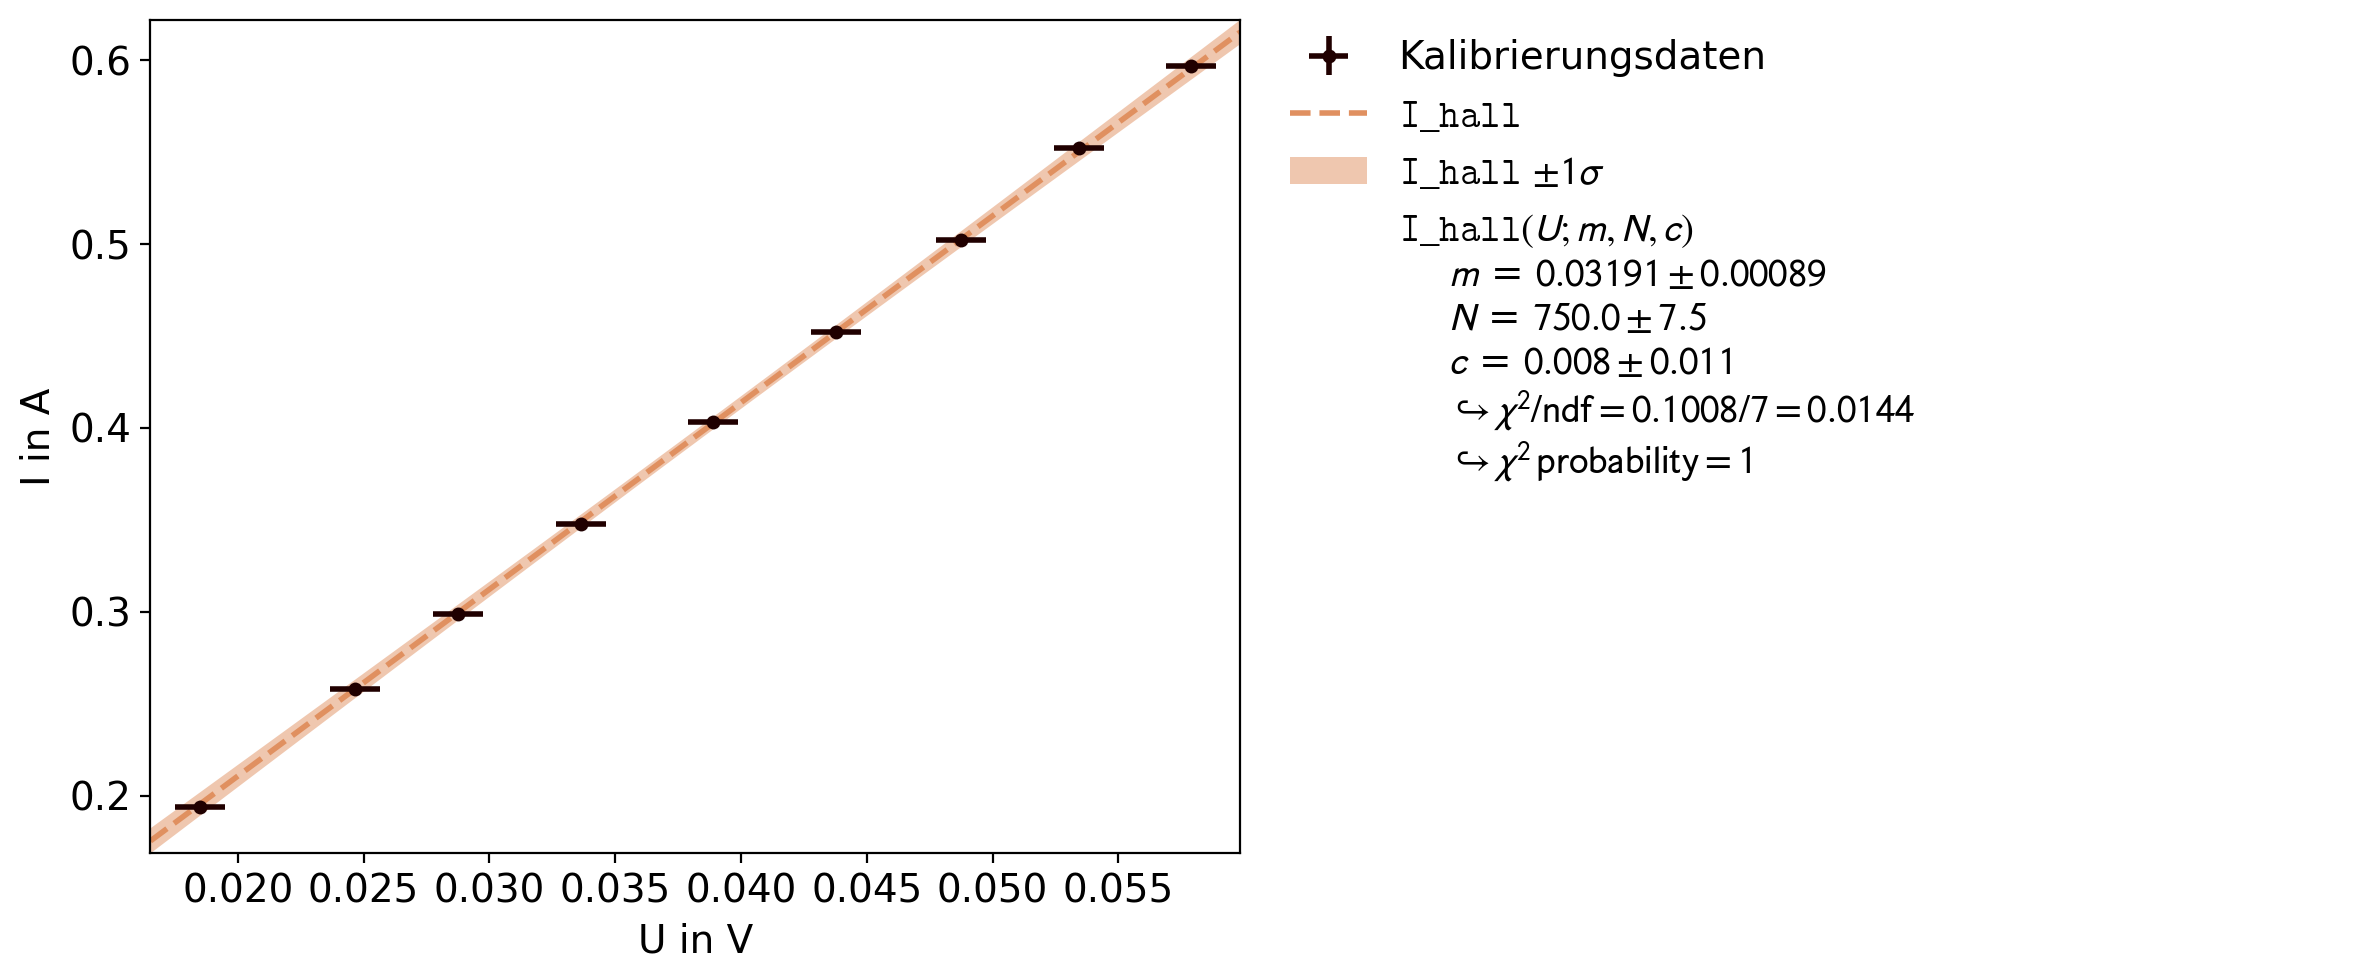

In [53]:
def I_hall(U, m, N, c=0):
    l = 0.3
    return m * U / (mu * N) * l + c
I_error = 0.001
U_error = 0.001
N_error = 0.01 # relative
fit = kafe2.XYFit(xy_data=[-U_cal * 10**(-3), I_cal], model_function=I_hall) 
fit.add_error(axis='y', err_val=I_error)
fit.add_error(axis='x', err_val=U_error)

fit.add_parameter_constraint(name='N',   value=750,   uncertainty=N_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.x_label="U in V"
plot.y_label="I in A"
plot.customize('data', 'label', [(0, "Kalibrierungsdaten")])
plot.plot()

plot.show()

par_vals = fit.parameter_values
par_err = fit.parameter_errors
m = par_vals[0]
m_err = par_err[0]
#print(m)

Der Fit ergibt ein Wert von $m = 0.03191\pm 0.00089 \frac{T}{V}$. Nun kann die gemessene Magnetfeldstärke in den Helmholtzspulenpaaren berechnet werden. Der Fehler auf B kann mit dem Gaußschen Fehlerfortpflanzungsgesetz bestimmt werden. Die Konstante c ist sehr klein. Dies lässt vermuten, dass der systematische Fehler sehr klein ist. 

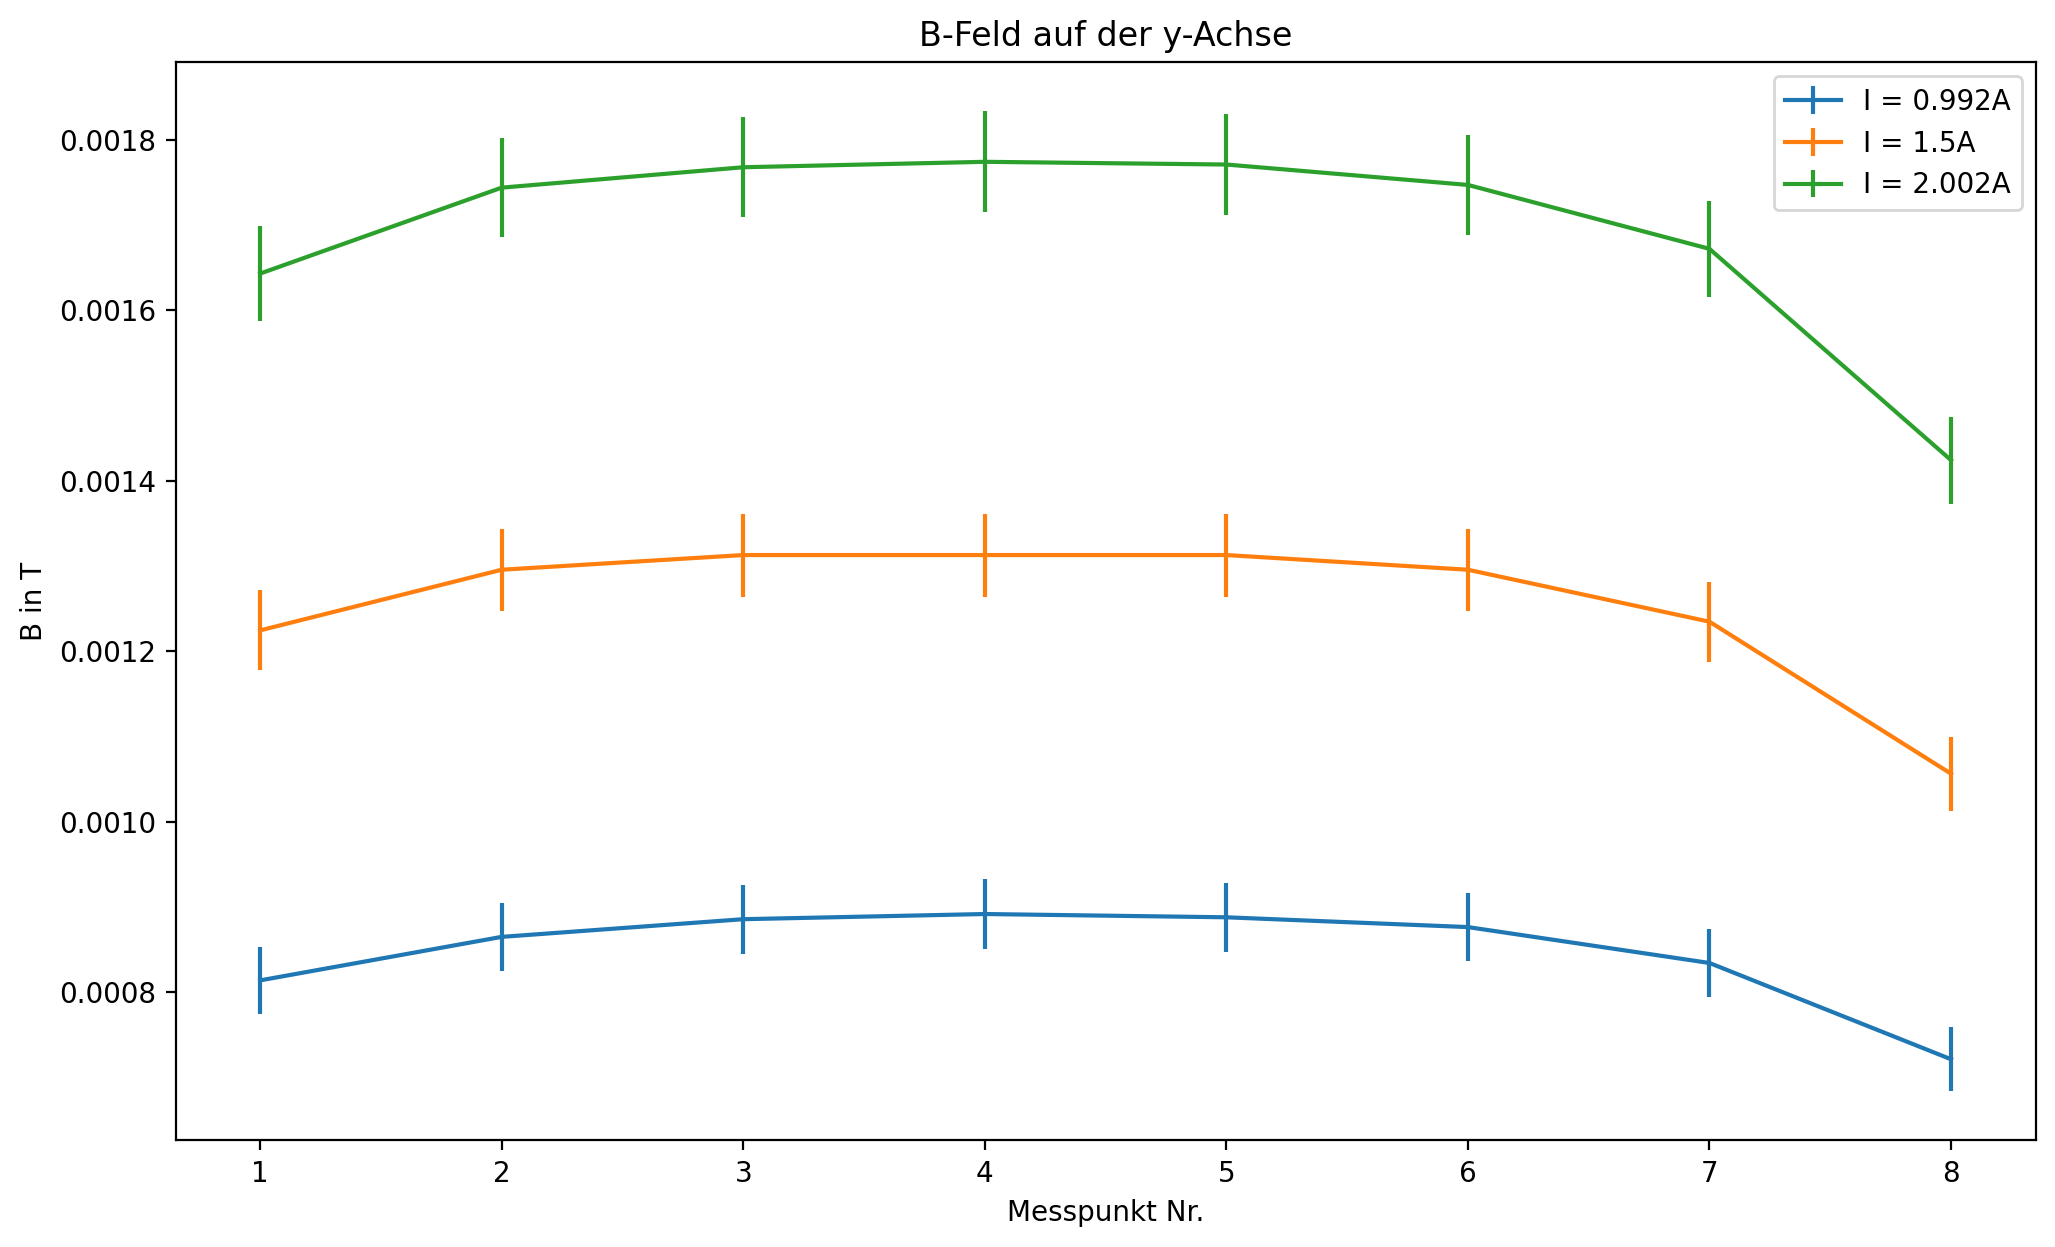

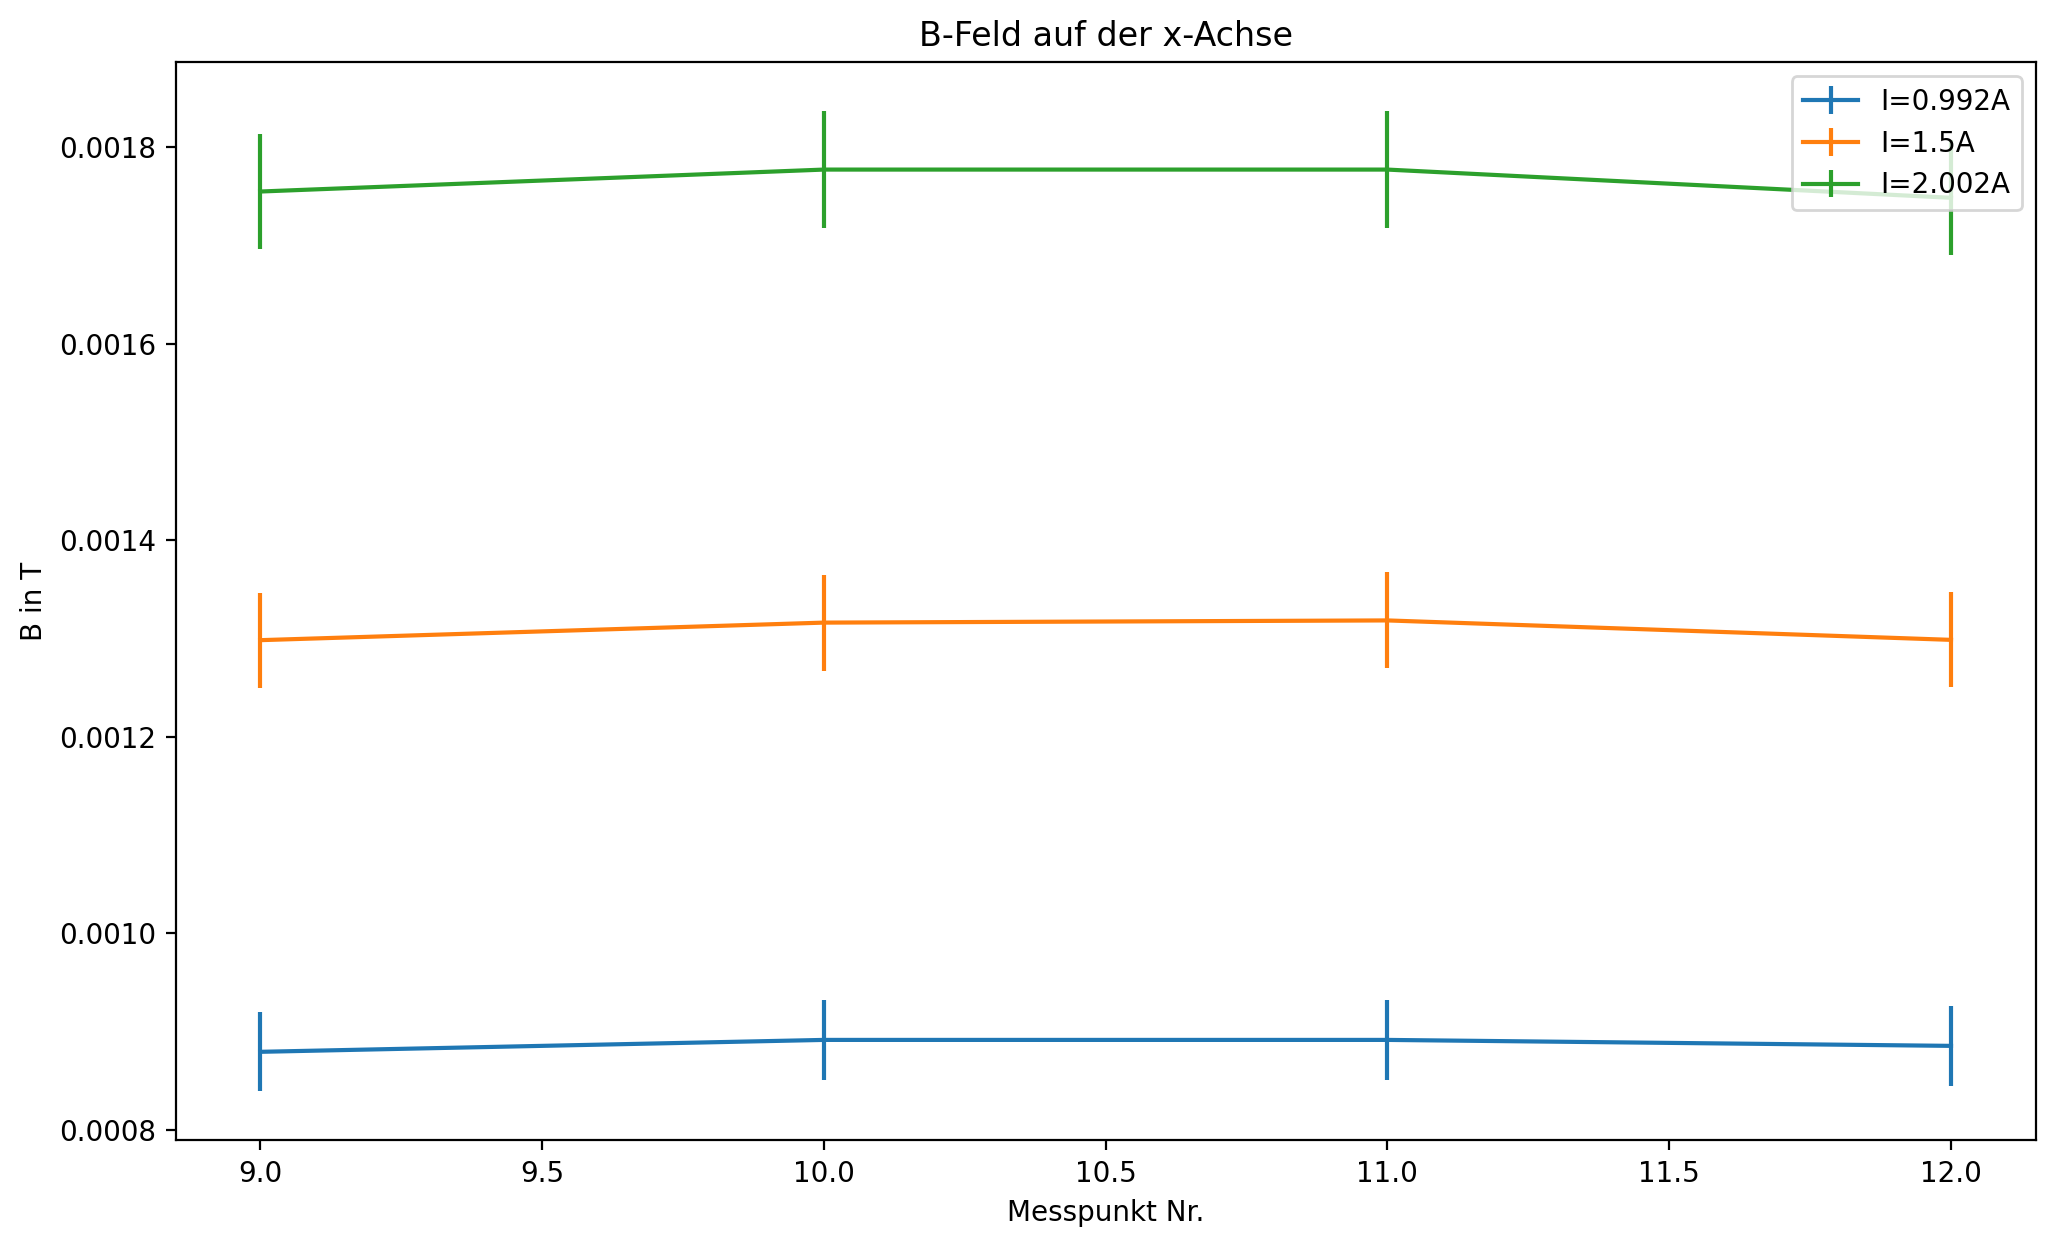

[]

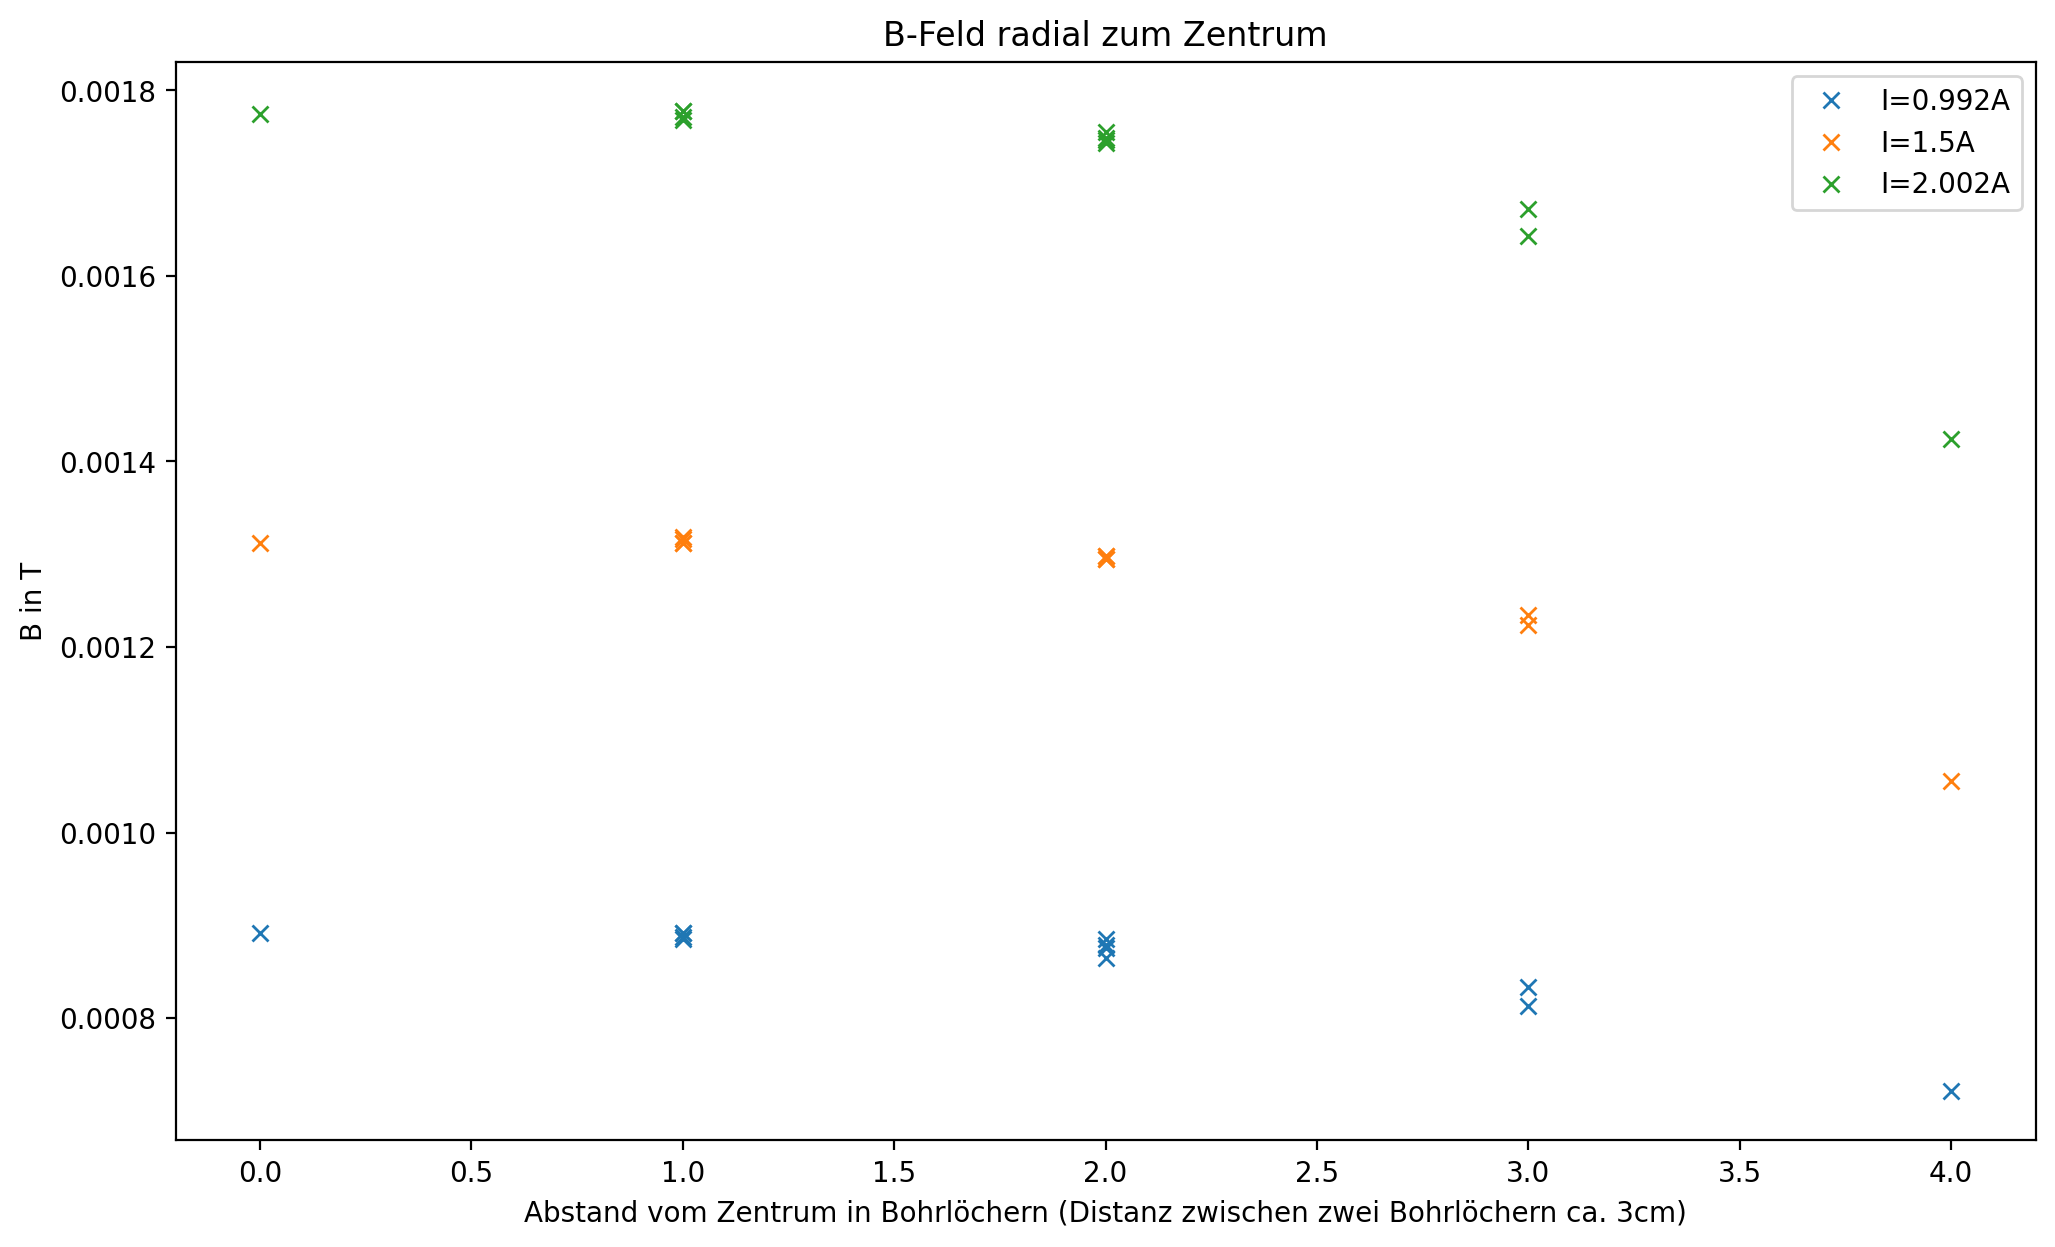

In [25]:
def B_helmh(U):
    return (m * U, np.sqrt((U * m_err)**2 + (m * U_error)**2)) # add error on B with gauss law

B, B_err = B_helmh(U_helmh * 10**(-3))

#plt.plot(pos[0:24:3], B[0:24:3], label="I = 0.992A")
plt.errorbar(pos[0:24:3], B[0:24:3], B_err[0:24:3], label="I = 0.992A")
plt.errorbar(pos[1:25:3], B[1:25:3], B_err[1:25:3], label="I = 1.5A")
plt.errorbar(pos[2:26:3], B[2:26:3], B_err[2:26:3], label="I = 2.002A")
plt.legend()
plt.title("B-Feld auf der y-Achse")
plt.xlabel("Messpunkt Nr.")
plt.ylabel("B in T")
plt.show()

plt.errorbar(pos[24:37:3], B[24:37:3], B_err[24:37:3],label="I=0.992A")
plt.errorbar(pos[25:37:3], B[25:37:3], B_err[25:37:3], label="I=1.5A")
plt.errorbar(pos[26:37:3], B[26:37:3], B_err[26:37:3],label="I=2.002A")
plt.legend(loc="upper right")
plt.title("B-Feld auf der x-Achse")
plt.xlabel("Messpunkt Nr.")
plt.ylabel("B in T")
plt.show()
labels = ["I=0.992A", "I=1.5A", "I=2.002A"]
for n in range(0, 3):
       plt.plot([0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4], [B[9 + n], B[6 + n], B[12 + n], B[27 + n], B[30 + n], B[3 + n], B[15 + n], B[24 + n], B[33 + n], B[0 + n], B[18 + n], B[21 + n]], "x", label=labels[n])
plt.legend()
plt.title("B-Feld radial zum Zentrum")
plt.xlabel("Abstand vom Zentrum in Bohrlöchern (Distanz zwischen zwei Bohrlöchern ca. 3cm)")
plt.ylabel("B in T")
plt.plot()

Es ist zu erkennen, dass das Magnetfeld im Zentrum sehr homogen ist. Auch wenn man etwas vom Zentrum abweicht, ist das Magnetfeld noch fast gleich. Weiter weg (Messung 8 und 1) sind jedoch relevante Abweichungen messbar. Im letzten Plot wurden die gemessenen Werte in Abhängigkeit vom Zentrum aufgetragen. Daraus ist zu erkennen, dass das Magnetfeld rotationssymmetrisch ist, und mit größerem Abstand zum Zentrum schwächer wird.

### Aufgabe 1.2: Elektronenkreisbahn

Bestimmen Sie den Durchmesser $d$ der Elektronenbahn im Fadenstrahlrohr in zwei Messreihen: 

 * Als als Funktion der Anodenspannung $U$ (z.B. mit sechs Messpunkten  $100$; $125$; $\ldots 250\,\mathrm{V}$) für zwei Spulenströme (z.B. $1\,\mathrm{A}$ und $2\,\mathrm{A}$).
 * Als Funktion des Spulenstroms $I$ (z.B. mit zehn Messpunkten $1,0$; $1,2$; $\ldots 2,0\,\mathrm{A}$) für zwei Anodenspannungen (z.B. $125\,\mathrm{V}$ und $250\,\mathrm{V}$).
 
---


**Lösung:** \
Für eine gegebene Stromstärke der Helmholtzspulen $I$ und gegebener Beschleunigungsspannung $U$, ist der Durchmesser des Elektronenstrahls durch folgende Formel gegeben:
$$
d = \sqrt{\frac{125}{8}\frac{U}{\frac{e}{m}}}\frac{R}{\mu_0 N I}
$$
Die Werte für $U$, $d$ und $I$ wurden gemessen. Die spezifische Ladung des Elektrons, $\frac{e}{m}$ soll nun mittels eines Fits bestimmt werden.Die $d$ Werte wurden folgendermaßen gemessen: Es wurde eine Vorrichtung vor dem Glaskolben angebracht, welche parallel zur einer Gerade durch den Mittelpunkt des Glaskolbens ist. An dieser Vorrichtung sind zwei Schieber angebracht. Ein Spiegel ist hinter dem Glaskolben. Nun muss man mit einem Auge den leuchtenden Elektronenstrahl und dessen Spiegelbild übereinander bringe. Dann schiebt man einen Schieber so weit, bis Gerade der Elektronenstrahl und sein Spiegelbild überdeckt werden würde. Das wird auf der anderen Seite wiederhol. Der Abstand der Schieber wird schließlich mit einem Geodreieck gemessen. Dies ist dann die gesuchte Größe $d$. Da mit diesem Messprozess viele Fehlerquellen verbunden sind, wird der Fehler relativ hoch geschätzt. \
Der Fehler auf I ergibt sich aus der Genauigkeit der Genauigkeit des Amperemeters. Dieser kann die Stromstärke bis auf die zweite Nachkommastelle genau messen.
Der Wert bei 250V und 1 - 1,2A konnte nicht bestimmt werden, da der Durchmesser des Elektronenstrahls größer als die Vorrichtung zur Messung des Durchmessers war.
Zunächst werden die Daten für eine veränderte Spannung bei konstantem Spulenstrom ausgewertet und analysiert.
Da bei jeder Messreihe im folgenden entweder die Stromstärke $I$, oder die Spannung $U$ über einen längeren Zeitraum konstant bleiben, während der jeweils andere Parameter auf bestimmte Werte gesetzt wird, nehmen wir einen systematischen Fehler auf den konstanten und den gemessenen Wert an. Dadurch werden diese im Fit etwas ausgeglichen. Zwei mögliche Quellen für systematische Fehler werden unten erläutert.

,Spannung in V,Strom in A,Durchmesser in cm
0,109.6,1.00,7.40
1,125.3,1.00,7.90
2,150.4,1.00,9.40
3,174.8,1.00,10.65
4,190.0,1.00,11.55
5,124.5,1.99,4.55
6,149.8,1.99,4.95
7,174.5,1.98,5.60
8,200.1,1.98,6.10
9,225.4,1.98,6.55


Unsere gemessenen Durchmesser der Elektronenstrahlen bei gleichbleibenden Stromstärken und veränderlichen Spannungen


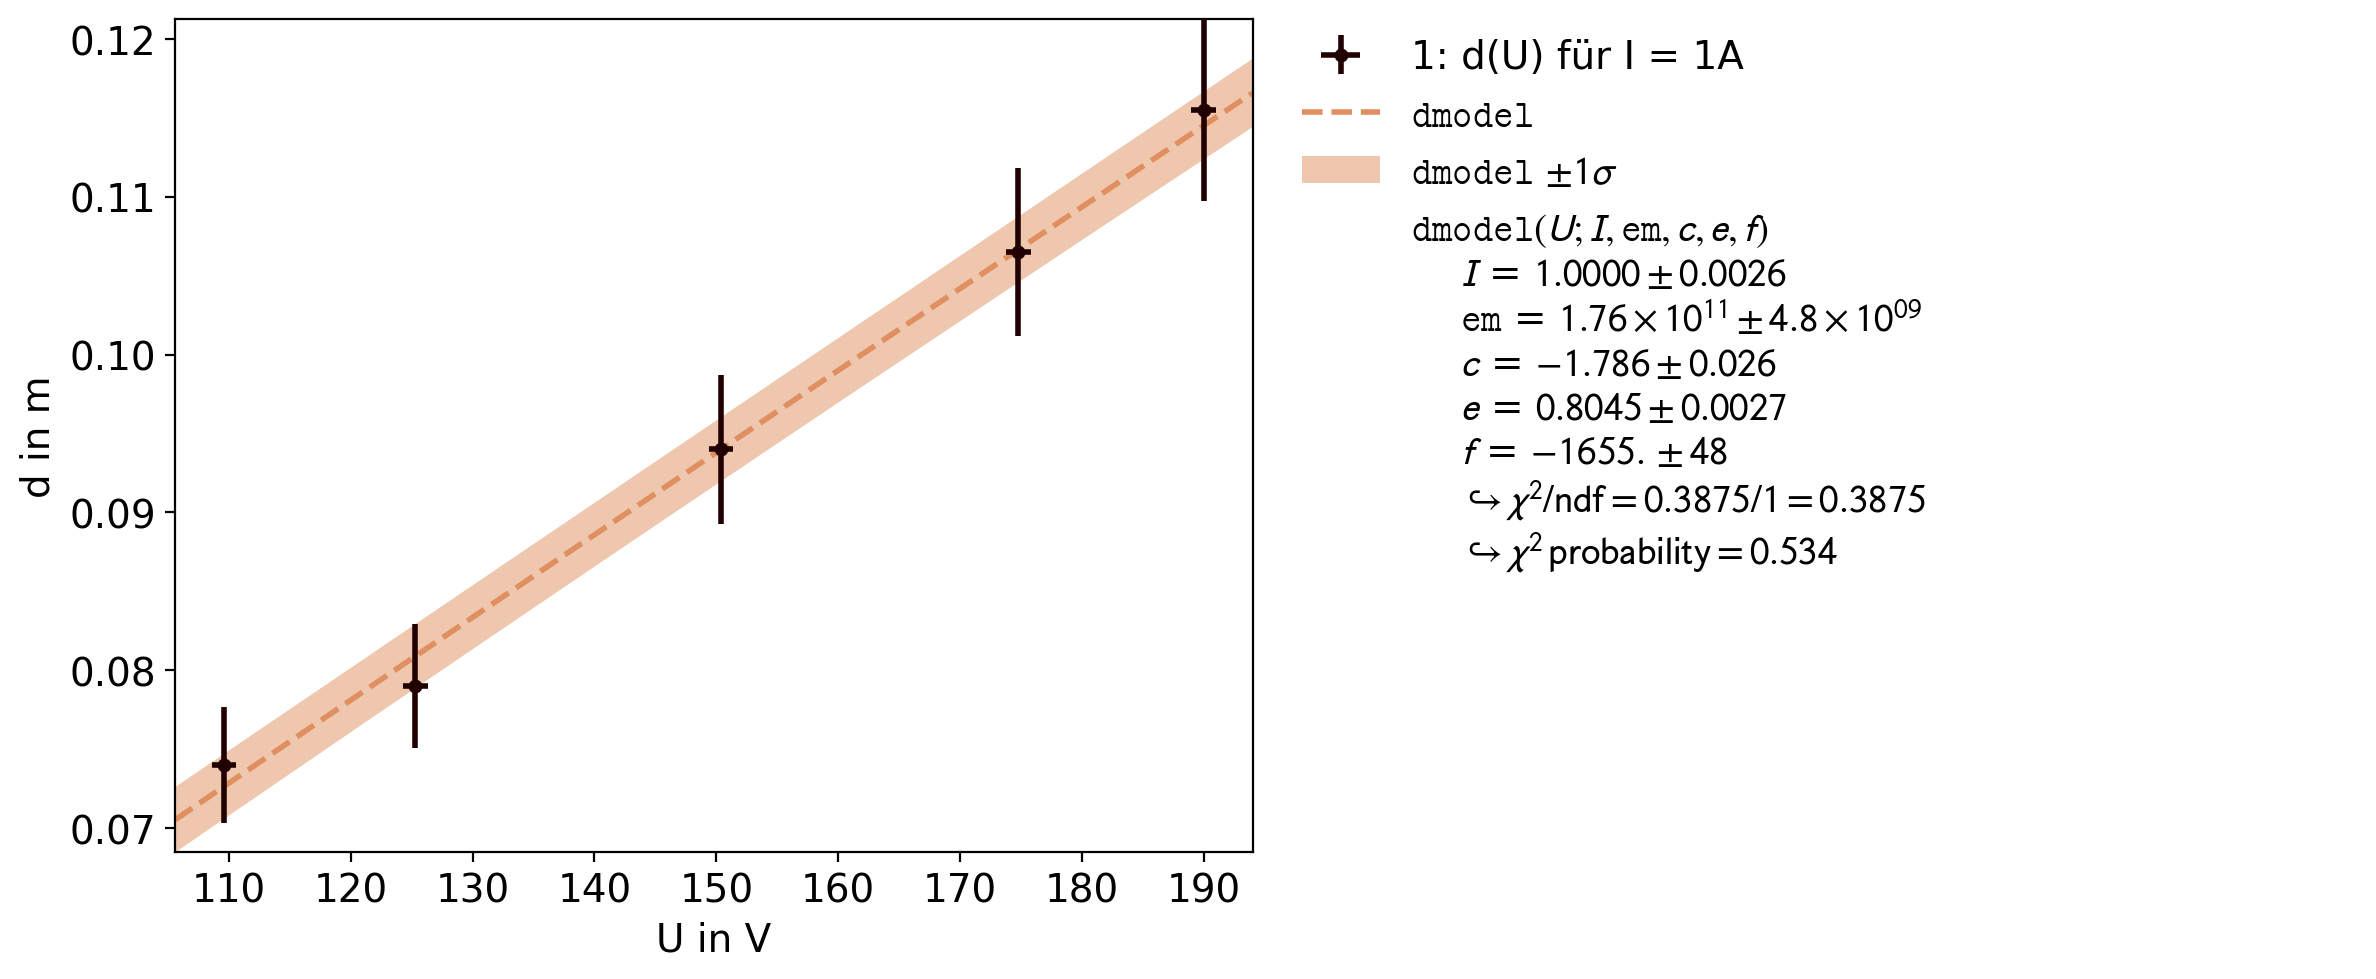

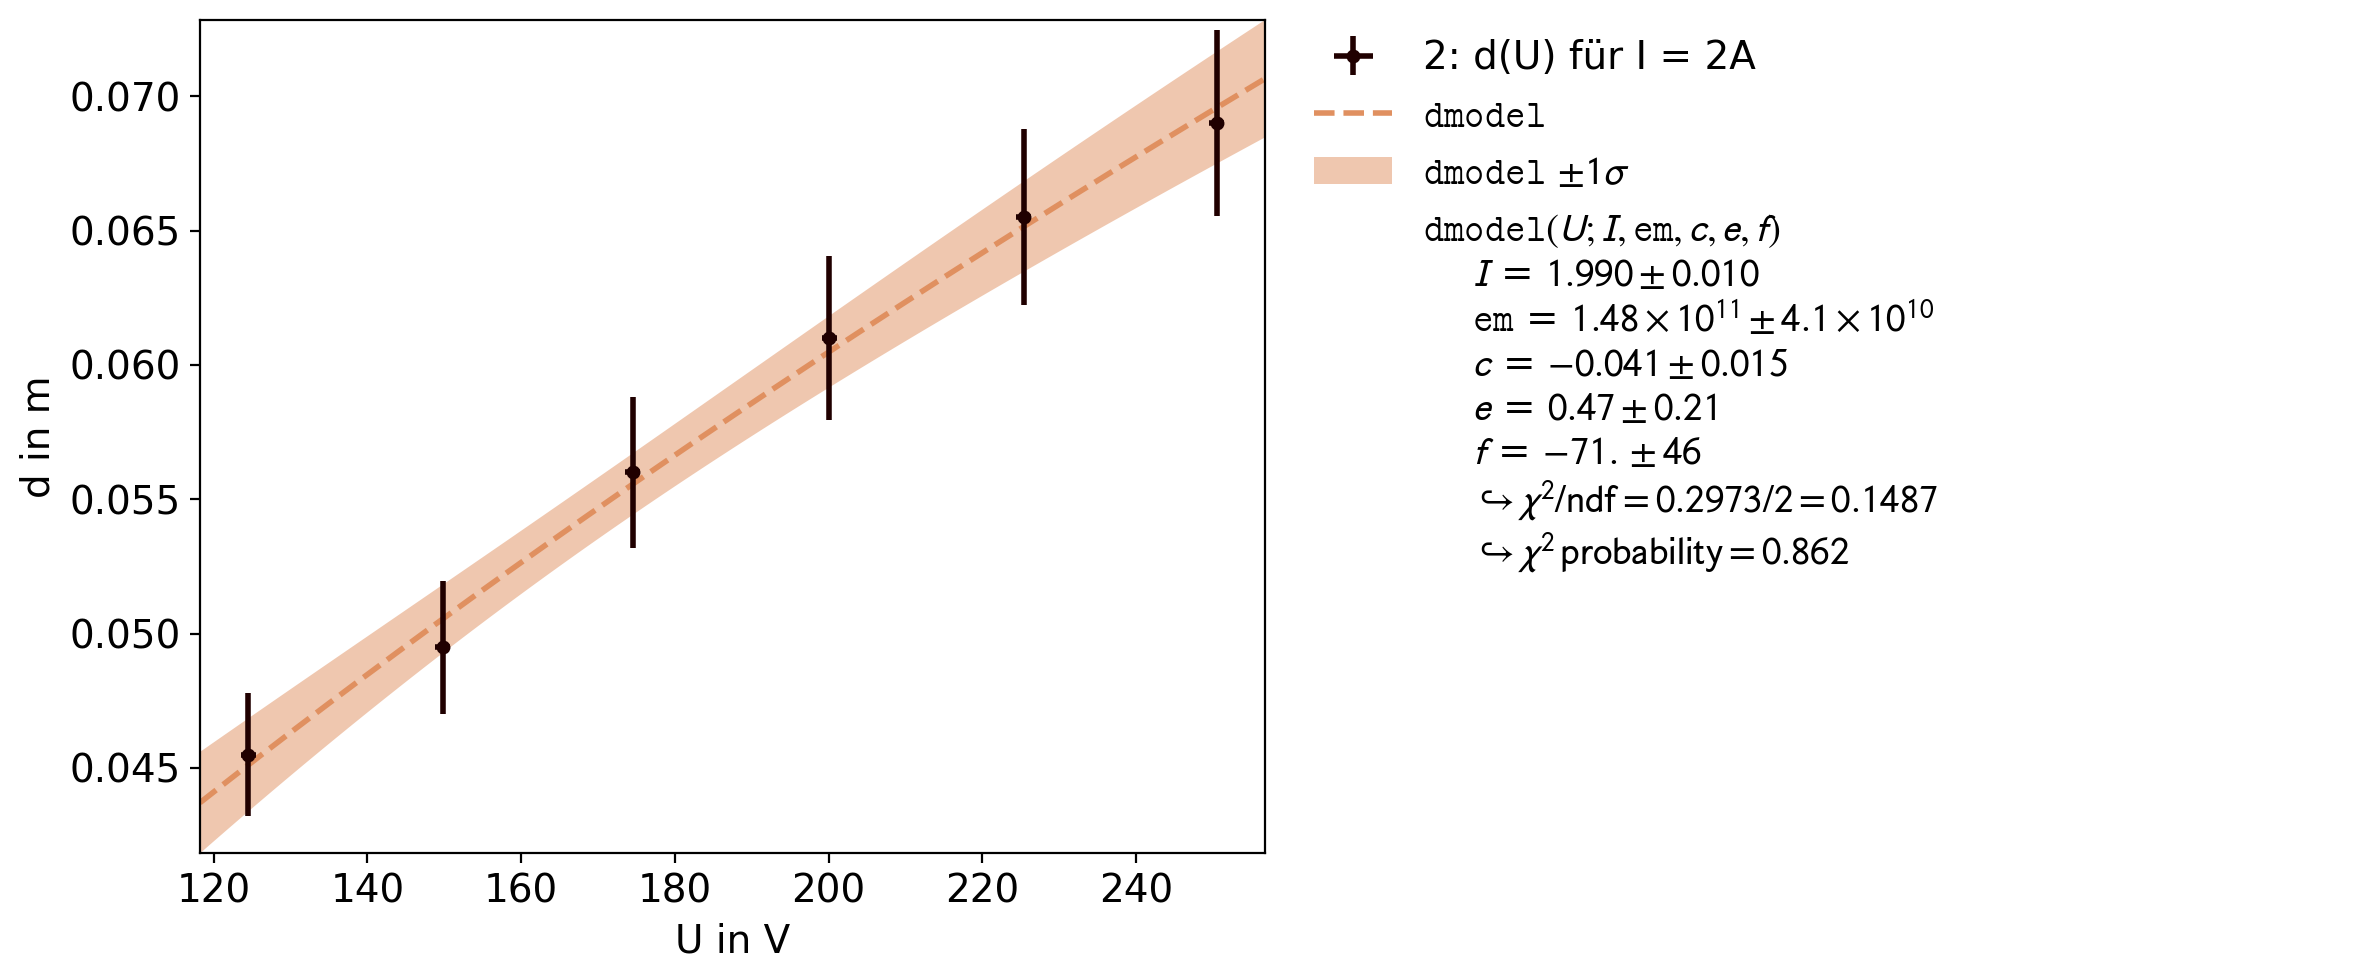

In [47]:
display(pd.read_csv('d_von_U.csv'))
print("Unsere gemessenen Durchmesser der Elektronenstrahlen bei gleichbleibenden Stromstärken und veränderlichen Spannungen" )

d_von_U = np.genfromtxt( "d_von_U.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
U = d_von_U[:,0]
#I = d_von_U[:,1]
d = d_von_U[:,2] * 10**(-2)

def dmodel(U, I, em=1.76*10**11, c=0, e=0, f=0): # x = U/I**2
    N = 130
    R = 0.15
    return (np.sqrt((U - f) * 125 / (8 * em)) * R / ( mu * N * (I - e))) + c

I_error = 0.01
U_error = 1
d_error = 0.05 # relative

#first with data for which I = 1A
fit = kafe2.XYFit(xy_data=[U[:5], d[:5]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=U_error)

fit.add_parameter_constraint(name="I", value=1, uncertainty=I_error)


fit.do_fit()
em_1 = fit.parameter_values[1]
d_em_1 = fit.parameter_errors[1]
plot = kafe2.Plot(fit)
plot.customize('data', 'label', [(0, "1: d(U) für I = 1A")])
plot.x_label="U in V"
plot.y_label="d in m"
plot.plot()
plot.show()


#now with data for which I = 2A
fit = kafe2.XYFit(xy_data=[U[5:], d[5:]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=U_error)

fit.add_parameter_constraint(name="I", value=1.99, uncertainty=I_error)


fit.do_fit()
em_2 = fit.parameter_values[1]
d_em_2 = fit.parameter_errors[1]
plot = kafe2.Plot(fit)
plot.customize('data', 'label', [(0, "2: d(U) für I = 2A")])
plot.x_label="U in V"
plot.y_label="d in m"
plot.plot()
plot.show()

Es ist zu erkennen, dass der resultierende Wert für $\frac{e}{m}$ für beide Messungen einigermaßen nah am Literaturwert ist, im Fall der ersten Messung ${\frac{e}{m_{\mathrm{e}}}}_1 = 1.76 \times 10^{11} \pm 4.8 \times 10^{9} C/kg$, sogar sehr nah. Dies ist interessant, da eigentlich zu erwarten gewesen wäre, dass bei der ersten Messung ein genauerer Wert herauskommt, da bei der zweiten Messung ${\frac{e}{m_{\mathrm{e}}}}_2 = 1.48 \times 10^{11} \pm 4.1 \times 10^{10} C/kg$ durch die kleiner Stromstärke wesentlich höhere Durchmesser des Elektronenstrahls aufgetreten sind (7-12cm). Dies ist dahingehend problematisch, da das Magnetfeld nach außen inhomogen und schwächer wird. Dass gerade dies nicht beobachtet wurde, lässt auf andere Systematische Fehler schließen, die nicht berücksichtigt wurde.
Nun werden die Daten für eine Konstante Spannung bei geändertem I untersucht.

,Spannung in V,Strom in A,Durchmesser in cm
0,125.7,1.000,8.40
1,125.7,1.100,7.70
2,125.7,1.200,7.50
3,125.7,1.295,6.90
4,125.7,1.400,6.70
5,125.7,1.497,6.30
6,125.7,1.598,5.70
7,125.7,1.700,5.60
8,125.7,1.801,5.40
9,125.7,2.004,4.30


Unsere gemessenen Durchmesser der Elektronenstrahlen bei gleichbleibender Spannung und veränderlichen Stromstärken


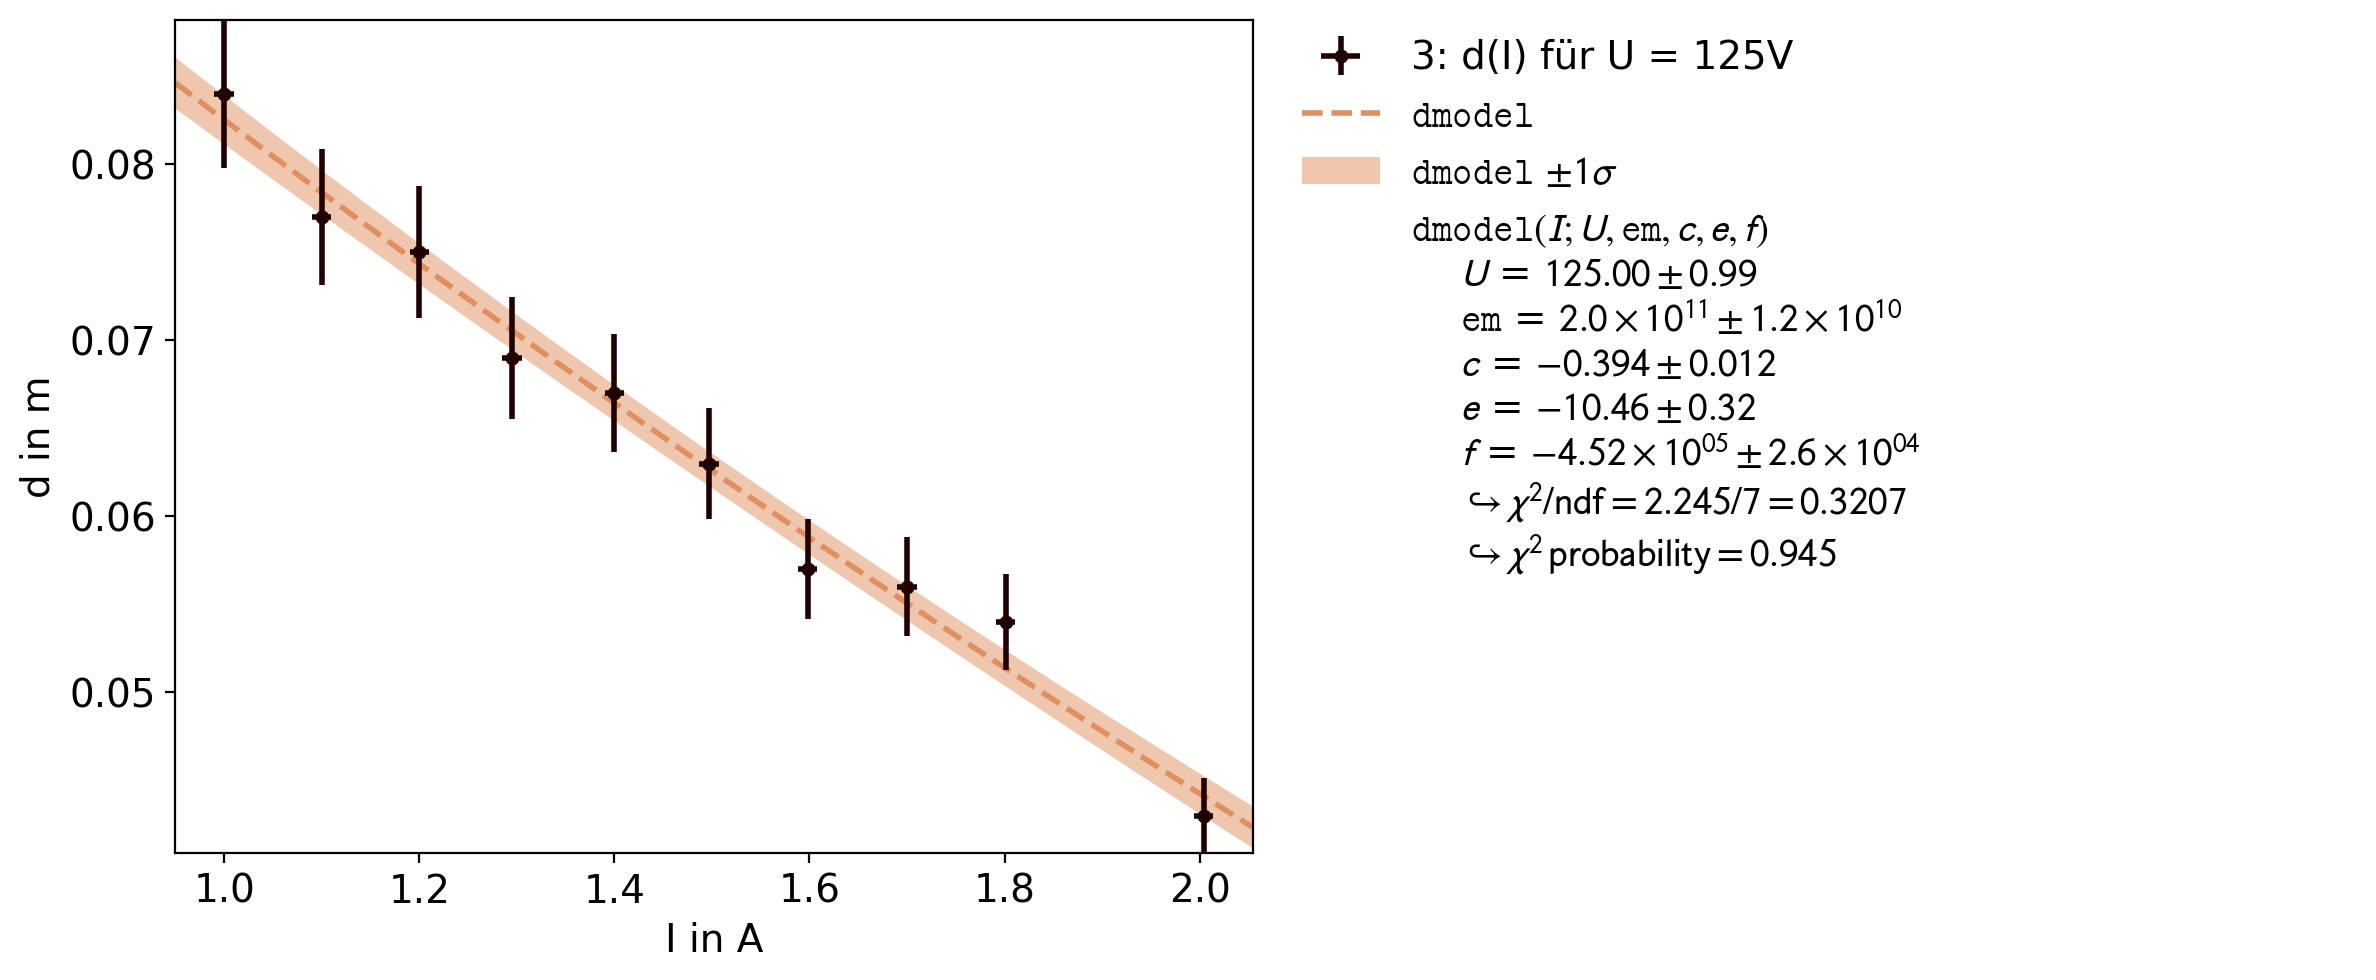

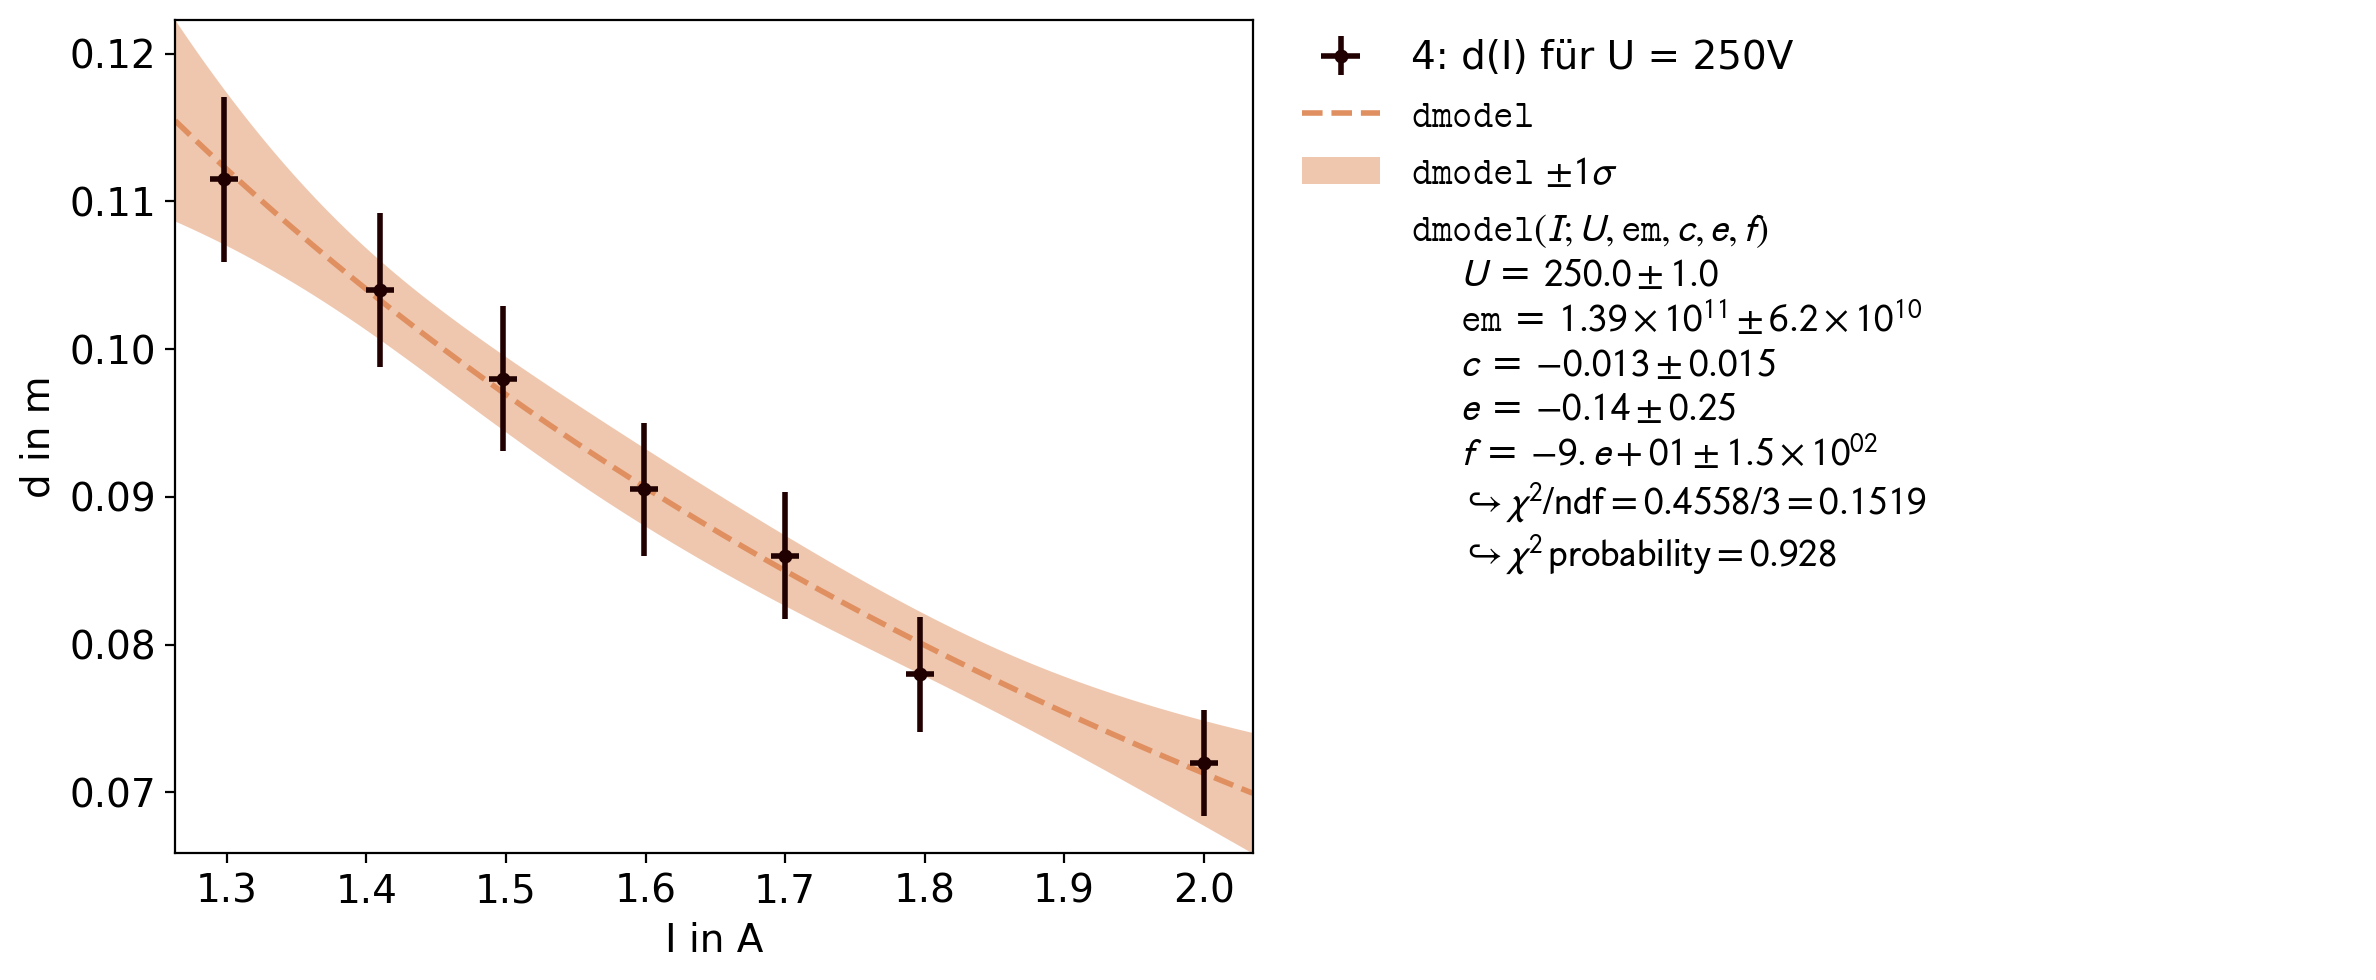

In [48]:
display(pd.read_csv('d_von_I.csv'))
print("Unsere gemessenen Durchmesser der Elektronenstrahlen bei gleichbleibender Spannung und veränderlichen Stromstärken")
d_von_U = np.genfromtxt( "d_von_I.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
U = d_von_U[:,0]
I = d_von_U[:,1]
d = d_von_U[:,2] * 10**(-2)
def dmodel(I, U, em= 1.76*10**11, c=0, e=0, f=0): 
    N = 130
    R = 0.15
    return np.sqrt((U - f) * 125 / (8 * em)) * R / ( mu * N * (I - e)) + c



#first with data for which U = 125V
fit = kafe2.XYFit(xy_data=[I[:10], d[:10]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative = True)
fit.add_error(axis='x', err_val=I_error)

fit.add_parameter_constraint(name='U', value=125,uncertainty=U_error)
fit.limit_parameter("U", lower=120, upper=130)

fit.add_parameter_constraint(name='em', value=2*10**11,uncertainty=10**11)

fit.do_fit()
em_3 = fit.parameter_values[1]
d_em_3 = fit.parameter_errors[1]
plot = kafe2.Plot(fit)
plot.customize('data', 'label', [(0, "3: d(I) für U = 125V")])
plot.x_label="I in A"
plot.y_label="d in m"
plot.plot()
plot.show()

#now with data for which U = 250V
fit = kafe2.XYFit(xy_data=[I[10:], d[10:]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative = True)
fit.add_error(axis='x', err_val=I_error)

fit.add_parameter_constraint(name='U', value=250, uncertainty=U_error)
fit.limit_parameter("U", lower=240, upper=260)
fit.limit_parameter("em", lower=10**10, upper=10**12)

fit.do_fit()
em_4 = fit.parameter_values[1]
d_em_4 = fit.parameter_errors[1]
plot = kafe2.Plot(fit)
plot.customize('data', 'label', [(0, "4: d(I) für U = 250V")])
plot.x_label="I in A"
plot.y_label="d in m"
plot.plot()
plot.show()

In der dritten und vierten Messreihe wurde einmal ein Wert ${\frac{e}{m_{\mathrm{e}}}}_3 = 2.0 \times 10^{11} \pm 1.2 \times 10^{10} C/kg$ etwas über (3) dem Literaturwert und etwas unter ${\frac{e}{m_{\mathrm{e}}}}_{4} = 1.39 \times 10^{11} \pm 6.2 \times 10^{10} C/kg$ (4) dem Literaturwert gemessen. Zwei teilweise nicht berücksichtigte Unsicherheiten sind: 
1. Die Netzgeräte können nicht konstant den Strom liefern / die Spannung halten, die am Anfang von jeder Messreihe aufgenommen wurde. Falls uns Unterschiede aufgefallen sind, habe wir diese zwar für die spezielle Messung angepasst, aber dies geschah auch erst, nachdem die eigentliche Messung bereits gemacht wurde.
2. Zwischen der zweiten und dritten Messreihe haben wir die Rollen getauscht, d.h. die Person, die die Messung des Durchmessers gemacht hat, hat mit der Person, die die Stromstärke / Spannung eingestellt und die Werte dafür und für den Durchmesser notiert hat, getauscht. Dadurch können sich kleine Unsicherheiten in den vier Messreihen ergeben, die nicht berücksichtigt werden können.

Noch eine Bemerkung zu den Verschiebungskonstanten $c, e, f$: Uns ist aufgefallen, dass diese teilweise sehr groß sind. Uns ist aber nicht klar geworden, weshalb diese so groß sind, z.B. ob dies an hohen systematischen Fehler liegt, oder nicht. Wir haben auch probiert, nur den systematischen Fehler auf die konstante zu berücksichtigen, die in einer Messreihe gleich bleibt (z.B. bei der vierten Messreihe den Parameter $e$ überhaupt nicht zu verwenden). Dies führt dann jedoch zu Fehlern, welche größer als der Wert von $\frac{e}{m} $ selbst ist, weshalb dies nicht sehr sinnvoll ist.

In [49]:
avg_em = (d_em_1 * em_1 + d_em_2 * em_2 + d_em_3 * em_3 + d_em_4 * em_4)/(d_em_1 + d_em_2 + d_em_3 + d_em_4)
avg_err = np.sqrt(d_em_1**2 + d_em_2**2 + d_em_3**2 + d_em_4**2)

print("Die gewichteten gemittelten Werte aus den Messreihen 1 - 4 ergeben für die spezifische Ladung des Elektrons (" + str('%.2E' % Decimal(avg_em)) + " +- " + str('%.2E' % Decimal(avg_err)) +") C/kg")
pull = calc_pull(avg_em, avg_err)
print("Der Pull beträgt: " + str(round(pull, 3)))

Die gewichteten gemittelten Werte aus den Messreihen 1 - 4 ergeben für die spezifische Ladung des Elektrons (1.50E+11 +- 7.50E+10) C/kg
Der Pull beträgt: 0.35


Der Pull der kombinierten Messung ist kleiner als 1 (0.35). Dies weißt auf eine gute Messung der spezifischen Elektronenladung hin. Nun soll diese noch mit einer weitern Methode bestimmt werden.

## Aufgabe 2: Methode von Busch

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-2.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/blob/main/Spezifische_Ladung_des_Elektrons/doc/Hinweise-Aufgabe-2.md).**

### Aufgabe 2.1: Vorbereitung der Messung

Machen Sie sich mit der Methode zur Bestimmung der von $e/m_{e}$ nach der Methode von Busch vertraut. Verändern Sie hierzu bei vorgegebener Beschleunigungsspannung $U_{z}$ den Spulenstrom, und erklären Sie Ihre Beobachtungen mit eigenen Worten.

---

**Lösung:**

Ist der Spulenstrom 0, so ist, wie erwartet, eine Gerade auf dem Bildschirm zu erkennen. Dies lässt sich mit der angelegten Wechselspannung am Ablenkkondensator begründen. Durch die unterschiedlichen Spannungen, die anliegen, werden die Elektronen unterschiedlich stark vertikal abgelenkt, weshalb sich insgesamt als Überlagerung aller möglichen Ablenkspannungen eine Gerade ergibt (die Frequenz der Wechselspannung ist für das menschliche Auge nicht wahrnehmbar). Wird der Spulenstrom erhöht, so krümmt sich der Strich, bis er schließlich fast punktförmig wird. Dies ist damit zu begründen, dass das Magnetfeld in Beschleunigungsrichtung der Elektronen verläuft. Dadurch wirkt nach dem Ablenkkondensator eine Lorentzkraft auf diese und sie fliegen in einer Spiralbahn. Stellt man das Magnetfeld gerade so stark ein, dass sie sich einmal "im Kreis" gedreht haben, so landen alle Elektronen theoretisch wieder in einem Punkt. Der Punkt ist jedoch nicht perfekt, da zum einen das Magnetfeld nicht homogen ist, und zum Anderen die Elektronen durch die endliche Ausdehnung des Ablenkkondensators von der ursprünglichen Flugbahn abgelenkt werden, sodass sich ihre Rotationsachse etwas verschiebt. All das führt zu einem geschätzten Fehler, der bei der abgelesenen Stromstärke berücksichtigt wird. 

### Aufgabe 2.2: Bestimmung von $e/m_{\mathrm{e}}$ 

Messen Sie für Beschleunigungsspannungen von $U = 200\,\ldots 700\,\mathrm{V}$ (in Schritten von $50\,\mathrm{V}$) den nötigen Spulenstrom $I$, um auf dem Schirm einen Signalpunkt zu erzeugen. Gehen Sie dabei, für jeden Messpunkt so, wie in Aufgabe 2.1 vor. Tragen Sie $U$ geeignet über $I^{2}$ auf und ermitteln Sie daraus $e/m_{\mathrm{e}}$. 

---

**Lösung:**

Eine theoretische Betrachtung ergibt für das Magnetfeld 
$$
B(a, I, \ell)=\mu_0\frac{I N}{l}\left(0,567\left(\frac{a}{\sqrt{R^{2}+a^{2}}}+\frac{\ell-a}{\sqrt{R^{2}+(\ell-a)^{2}}}\right)\right). 
$$
Zu der Formel eines Magnetfelds in der langen Spule muss also ein geometrischer Faktor hinzugefügt werden. \
Weiter gilt für die Geschwindigkeit nach der Beschleunigungsspannung:
$$
v_{z} = \sqrt{2\,U\,e/m_{\mathrm{e}}}
$$
Für die Lorentzkraft durch das Magnetfeld gilt:
$$
F_L = F_Z \Leftrightarrow e\ v_{e}\,\langle B\rangle = m_{e}\frac{v_{e}^{2}}{a_{\mathrm{max}}} \Leftrightarrow \frac{e}{m_{\mathrm{e}}}\langle B\rangle = \frac{v_{e}}{a_{\mathrm{max}}}
$$
Wobei $\langle B\rangle$ der Mittelwert des Magnetfelds auf dem relevanten Intervall ist:
$$
\langle B\rangle = \frac{1}{d_{S}-d_{i}} \int\limits_{d_{i}}^{d_{S}}B(a, I, N, \ell)\mathrm{d}a 
$$
Mit $ v = \omega r $ gilt:
$$
 \frac{v_{e}}{a_{\mathrm{max}}} = \omega = 2\pi \frac{v_{z}}{d_{S}-d_{i}}
$$
Also
$$
 \frac{e}{m_{\mathrm{e}}} \frac{1}{d_{S}-d_{i}} \int\limits_{d_{i}}^{d_{S}}B(a, I, N, \ell)\mathrm{d}a  = 2\pi \frac{v_{z}}{d_{S}-d_{i}} \Leftrightarrow  \frac{e}{m_{\mathrm{e}}} \int\limits_{d_{i}}^{d_{S}}B(a, I, N, \ell)\mathrm{d}a = 2\pi v_{z} \Leftrightarrow    \frac{e}{m_{\mathrm{e}}} \int\limits_{d_{i}}^{d_{S}}\mu_0\frac{I N}{l}\left(0,567\left(\frac{a}{\sqrt{R^{2}+a^{2}}}+\frac{\ell-a}{\sqrt{R^{2}+(\ell-a)^{2}}}\right)\right)\mathrm{d}a = 2\pi v_{z}
$$
mit 
$$ 
k = \int\limits_{d_{i}}^{d_{S}}\mu_0\frac{N}{l}\left(0,567\left(\frac{a}{\sqrt{R^{2}+a^{2}}}+\frac{\ell-a}{\sqrt{R^{2}+(\ell-a)^{2}}}\right)\right)\mathrm{d}a
$$
folgt also
$$ 
\frac{e}{m_{\mathrm{e}}} I k = 2\pi \sqrt{2\,U\,e/m_{\mathrm{e}}} \Leftrightarrow U = \frac{1}{8} \left(\frac{ I k}{ \pi}\right)^2 \frac{e}{m_{\mathrm{e}}} 
$$ 
Diese letzte Formel für $U$ wurde als Modell genommen, um die Werte zu fitten. Zunächst muss die Konstante $k$ herausgefunden werden. Dazu wird das Integral numerisch ausgewertet. Da  für diese Auswertung fehlerbehaftete Größen benutzt werden, hat auch $k$ einen Fehler. Dazu wird das Integral für jede fehlerbehaftete Größe zwei mal, jeweils an der unteren und oberen der gerade betrachteten Größe ausgewertet. Dann wird der gesamte Fehler durch das Fehlerfortpflanzungsgesetz bestimmt. Dann ergibt sich:
$$
\Delta k = \sqrt{ (\Delta_{\mathrm{L}} k)^2 +  (\Delta_{\mathrm{R}} k)^2 +  (\Delta_{\mathrm{d2}} k)^2  (\Delta_{\mathrm{comp}} k)^2 }
$$
Wobei ein numerischer Fehler durch die Integration in form von $\Delta_{\mathrm{comp}} k$ berücksichtigt wurde. 

In [18]:
# bestimme zuerst konstante K * (ds - d2) für den Mittelwert des Magnetfeldes
l = 0.2  # +- 0.0005
R = 0.045 # +-0.0005
N = 3000
d2 = 0.08 # +- 0.001
ds = 0.15
def B(a):
    return mu * N / l * 0.567 * (a/np.sqrt(R**2 + a**2) + (l - a)/np.sqrt(R**2 + (l - a)**2))
k =  scipy.integrate.quad(B, d2, ds)

In [19]:
#Bestimmung des Fehlers von k; es wird berücksichtigt: Integrationsunsicherheit von scipy, Fehler in l R, d2
k0 = k[0]#0.0013435370205851793; 

k1 = 0.0013412079923252028 # + in l
k2 = 0.0013458624795267087 # - in l

k3 = 0.0013407491868634852 # + in R
k4 = 0.0013463147265669803 # - in R

k5 = 0.0013242059973940048 # + in d2
k6 = 0.0013628503364845855 # - in d2

dk = np.sqrt((k1-k0)**2 + (k2-k0)**2 + (k3-k0)**2 + (k4-k0)**2 + (k5-k0)**2 + (k6-k0)**2 + (k[1])**2) # systematic and numerical error on k


Die Berechnung von k ergab $ k = 0.00134 \pm 2.78 \times 10^{-5}$

Während der Messung haben wir bei zwei unterschiedlichen Spannungen die Grenzen der Stromstärke, bei denen sich noch ungefähr ein Punkt ergibt nach oben und unten abgeschätzt. Wir schätzten den Toleranzbereich auf $\pm 0.008A$. Da die Beschleunigungsspannung von einem Gerät geliefert wird, für das keine Unsicherheiten evtl. falsche Kalibrierungen bekannt sind, werden eventuelle systematische Fehler von U durch die Konstante $d$ im Modell berücksichtigt. Der wesentlich kompaktere Versuchsaufbau des Experiments nach Busch schließt viele systematische Fehlerquellen aus der Methode in Aufgabe 1 aus.

,Spannung U in V,Strom in A
0,200,0.202
1,250,0.239
2,300,0.271
3,350,0.299
4,400,0.319
5,450,0.333
6,500,0.359
7,550,0.379
8,600,0.394
9,650,0.404


Unsere gemessenen Stromstärken bei veränderlicher Beschleunigungsspannung zur Erzeugung eines Signalpunktes


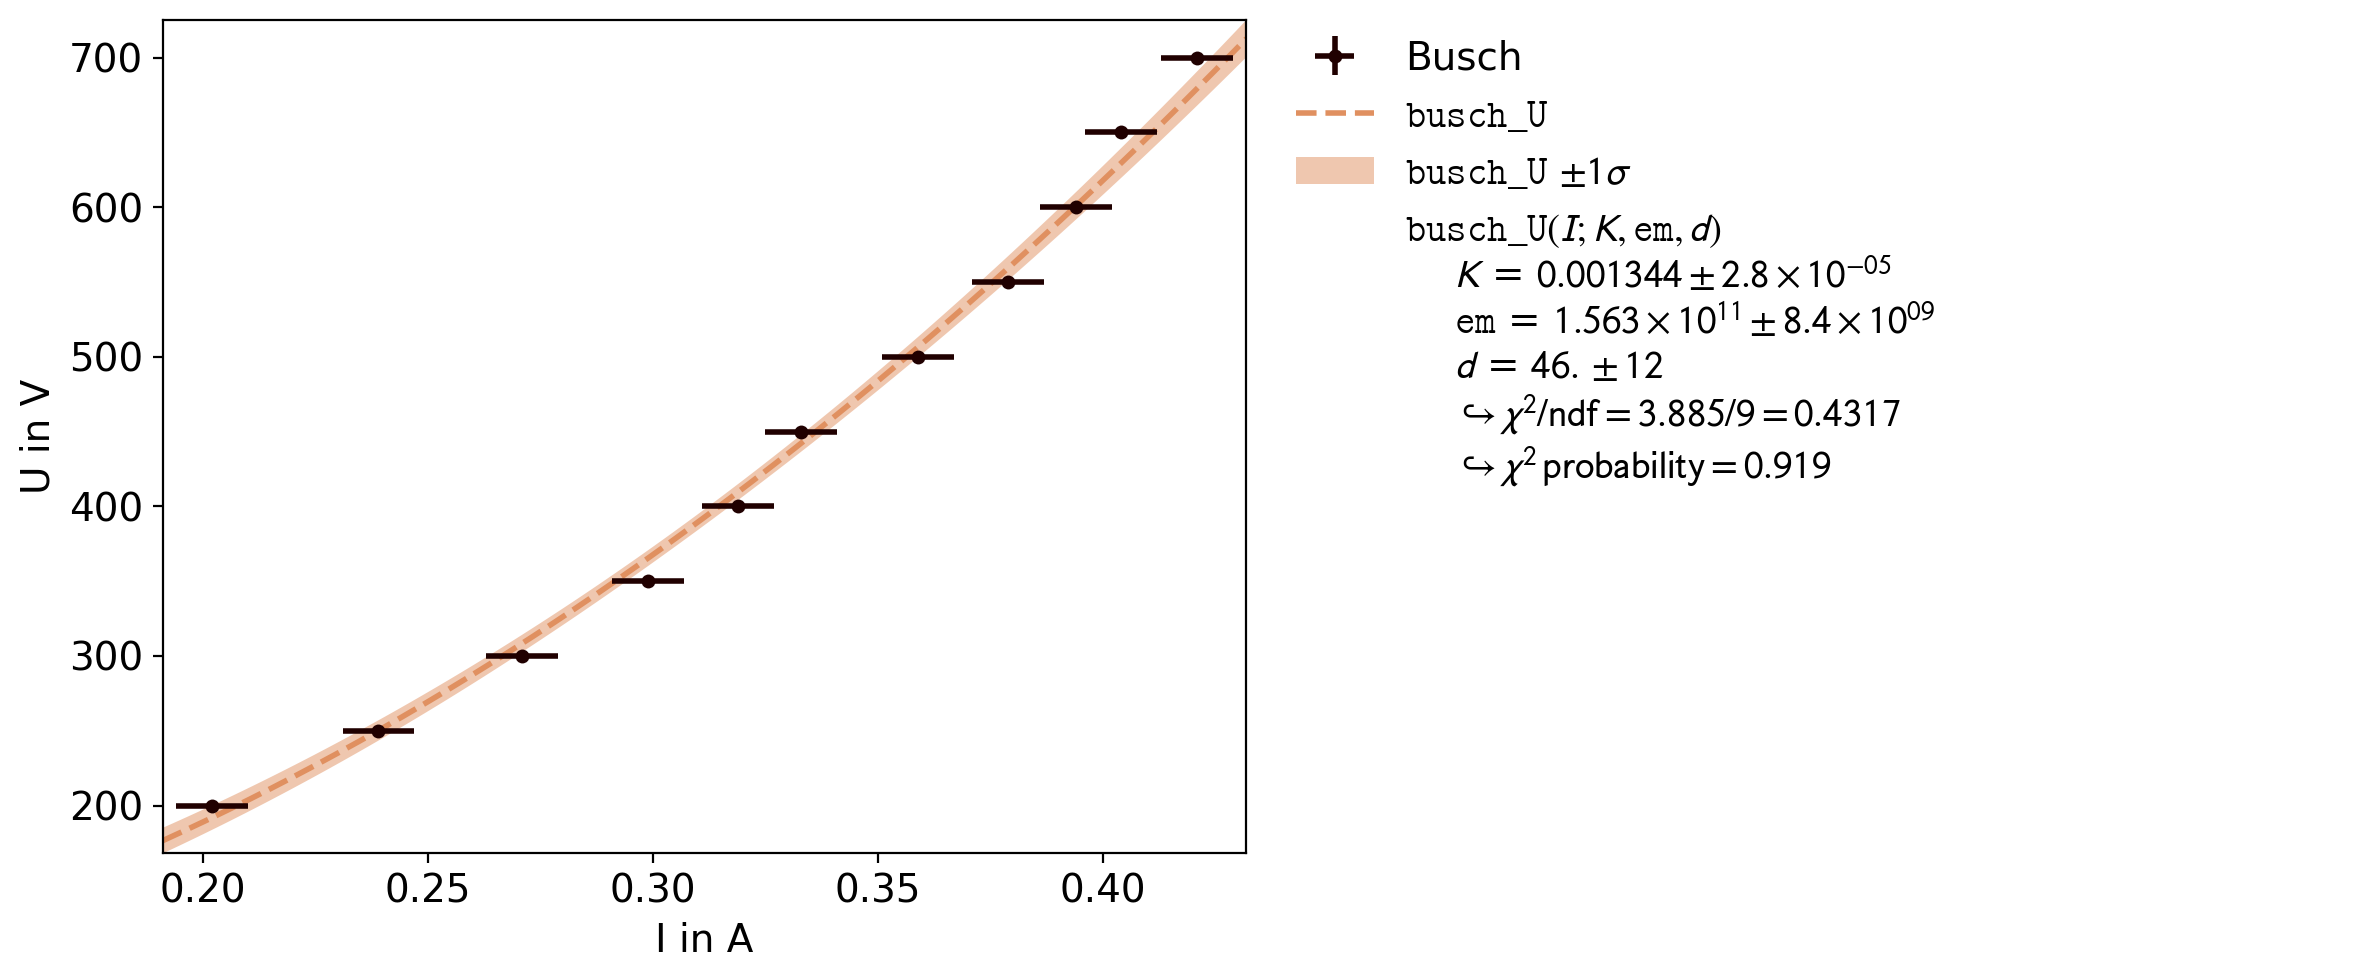

Der Pull beträgt: 2.342


In [51]:
display(pd.read_csv('busch.csv'))
busch_data = np.genfromtxt("busch.csv", delimiter=",", skip_header=1 )
print("Unsere gemessenen Stromstärken bei veränderlicher Beschleunigungsspannung zur Erzeugung eines Signalpunktes")

U_b = busch_data[:,0]
I_b = busch_data[:,1]

def busch_U(I, K, em=1.76*10**11, d=0):
    return 1/(np.pi**2 * 8) * K**2 * em * (I)**2 + d

I_error = 0.008
U_error = 1

fit = kafe2.XYFit(xy_data=[I_b, U_b], model_function=busch_U) 
fit.add_error(axis='y', err_val=U_error)
fit.add_error(axis='x', err_val=I_error)

fit.add_parameter_constraint(name="K", value=k0, uncertainty=dk)

fit.do_fit()
em_busch = fit.parameter_values[1]
d_em_busch = fit.parameter_errors[1]

plot = kafe2.Plot(fit)
plot.customize('data', 'label', [(0, "Busch")])
plot.x_label="I in A"
plot.y_label="U in V"
plot.plot()
plot.show()

print("Der Pull beträgt: " + str(round(calc_pull(em_busch, d_em_busch), 3)))

Das Ergebnis des Fits ist: $\frac{e}{m_{\mathrm{e}}} = 1.563 \times 10^{11} \pm 8.4 \times 10^{9} C/kg$\
Es ist festzustellen, dass der Pull sehr klein ist. Mit dieser Methode haben wir $\frac{e}{m_e}$ genauer bestimmen können, als mit dem Fadenstrahlrohr. Dies liegt unter anderem daran, dass außer die Unsicherheit in der Punktförmigkeit keine weiteren nennenswerten Messfehler auftraten. Für die  inhomogenität des Magnetfeldes konnte mit dem Mittelwert ein gutes Ergebnis erielt werden. Bei dem Fadenstrahlrohr war die Bestimmung des Durchmessers aufgrund der nicht festen Versuchsanordnung sehr fehleranfällig. Auch wurde die Inhomogenität bei großen Durchmessern vernachlässigt.